<h1>TASK 2</h1>

In [40]:
import pickle
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

<h5> IMPORTING THE DATASETS </h5>

In [41]:
# Open the pickle file for reading
with open("train_dataset.pickle", "rb") as f:
    arr = pickle.load(f)
with open("test_dataset.pickle", "rb") as f:
    testd = pickle.load(f)

In [42]:
np.random.seed(100)
np.random.shuffle(arr)
# randomly shuffling the data
res = np.array_split(arr, 20)

<h5> CALCULATING BIAS^2, VARIANCE, MSE AND IRREDUCIBLE ERROR </h5>

In [43]:
xTval = testd[:, 0].reshape(-1, 1)
yTval = testd[:, 1].reshape(-1, 1)

arr = []
bias = []
var = []
mse = []
biasSq = []
ir = []

for deg in range(1, 16):
    polyFeatures = PolynomialFeatures(degree=deg)
    xtest = polyFeatures.fit_transform(xTval)
    sumB = np.zeros(200)
    varYPred = []
    sumM = np.zeros(200)
    for i in range(20):
        xtrain = polyFeatures.fit_transform(res[i][:, 0].reshape(-1, 1))
        ytrain = res[i][:, 1].reshape(-1, 1)
        lr = LinearRegression().fit(xtrain, ytrain)
        yPredict = lr.predict(xtest)
        subY = np.subtract(yPredict, yTval)
        subYsq = np.square(subY)
        varYPred.append(yPredict)
        sumB = np.add(sumB, subY)
        sumM = np.add(sumM, subYsq)

    arr = np.absolute((sumB) / 20)
    biasSqInt = np.square((sumB) / 20)
    biasSq.append(np.mean(biasSqInt))
    sumM /= 20
    mse.append(np.mean(sumM))
    variances = np.var(varYPred, axis=0)
    var.append(np.mean(variances))
    bias.append(np.mean(arr))
    ir.append(np.mean(sumM) - np.mean(biasSqInt) - np.mean(variances))


<h5> PLOTTING THE GRAPHS </h5>

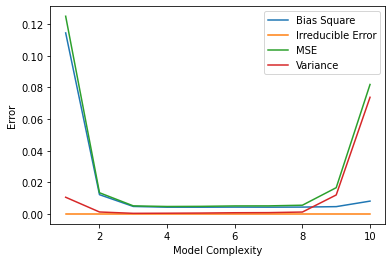

In [44]:
deg = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.plot(deg[0:10], biasSq[0:10], label = "Bias Square")
plt.plot(deg[0:10], ir[0:10], label = "Irreducible Error")
plt.plot(deg[0:10], mse[0:10], label = "MSE")
plt.plot(deg[0:10], var[0:10], label = "Variance")
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.legend()
plt.show()

<h5>TABULATING THE OUTCOMES</h5>

In [45]:

titles = ['Degree', 'Bias', 'Bias Square', 'Variance', 'MSE', 'Irreducible Error']

print('{:<7}|  {:<25}|  {:<25}|  {:<25}|  {:<25}|  {:<25}'.format(*titles))
print('-' * 146)
for item in zip(deg, bias, biasSq, var, mse, ir):
    print('{:<7}|  {:<25}|  {:<25}|  {:<25}|  {:<25}|  {:<25}'.format(*item))

Degree |  Bias                     |  Bias Square              |  Variance                 |  MSE                      |  Irreducible Error        
--------------------------------------------------------------------------------------------------------------------------------------------------
1      |  0.269347434813731        |  0.1145311821094268       |  0.010543255949895651     |  0.12507443805932245      |  -1.734723475976807e-18   
2      |  0.08597088969438774      |  0.012174557431817525     |  0.0012204083474801422    |  0.01339496577929767      |  2.3852447794681098e-18   
3      |  0.03330844622207401      |  0.004720843707298192     |  0.0003701877481543818    |  0.005091031455452575     |  1.4094628242311558e-18   
4      |  0.025331018318202905     |  0.0042506178758128       |  0.00044634557793805875   |  0.00469696345375086      |  1.4094628242311558e-18   
5      |  0.025252900944629356     |  0.004243467433071845     |  0.0005465717386827752    |  0.00479003917175462

In [46]:

titles = ['Bias', 'Variance']

print('{:<25}|  {:<25}'.format(*titles))
print('-' * 51)
for item in zip(bias,var):
    print('{:<25}|  {:<25}'.format(*item))

Bias                     |  Variance                 
---------------------------------------------------
0.269347434813731        |  0.010543255949895651     
0.08597088969438774      |  0.0012204083474801422    
0.03330844622207401      |  0.0003701877481543818    
0.025331018318202905     |  0.00044634557793805875   
0.025252900944629356     |  0.0005465717386827752    
0.026107711686110757     |  0.000744096814052807     
0.025190983929929342     |  0.0008143086391643617    
0.025362653957637992     |  0.0011837949232124478    
0.029336508599132036     |  0.011992898866267112     
0.03695491258452591      |  0.07380265782404047      
0.04167806102583516      |  0.14941124918504756      
0.04334779466550367      |  0.2067322478822584       
0.04184663930937454      |  0.5232691189784373       
0.10168716728642574      |  1.4521304710731764       
0.17188469094542053      |  11.875190608071728       


In [47]:

titles = ['Irreducible Error']

print('{:<25}'.format(*titles))
print('-' * 25)
for item in zip(ir):
    print('{:<25}'.format(*item))

Irreducible Error        
-------------------------
-1.734723475976807e-18   
2.3852447794681098e-18   
1.4094628242311558e-18   
1.4094628242311558e-18   
3.2526065174565133e-19   
4.336808689942018e-19    
1.0842021724855044e-19   
6.505213034913027e-19    
1.734723475976807e-18    
0.0                      
5.551115123125783e-17    
0.0                      
1.1102230246251565e-16   
-2.220446049250313e-16   
1.7763568394002505e-15   
